In [116]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
!ls ../data

Customer.csv      Transactions.csv  prod_cat_info.csv


In [3]:
customer = pd.read_csv('../data/Customer.csv')
prod_cat_info = pd.read_csv('../data/prod_cat_info.csv')
transactions = pd.read_csv('../data/Transactions.csv')

In [64]:
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [97]:
customer.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [7]:
# Details for each unique customer
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [65]:
customer[(customer['Gender']).isna() | (customer['city_code']).isna()]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


In [73]:
# Drop row with missing data - only one entry for each customer
customer = customer[(customer['Gender'].notna()) & (customer['city_code'].notna())]
customer.reset_index(drop=True, inplace=True)

In [102]:
customer.loc[:, 'DOB'] = customer.loc[:, 'DOB'].apply(pd.to_datetime)

In [119]:
customer.loc[:, 'customer_age_years'] = customer['DOB'].apply(lambda x: relativedelta(datetime.now(), x).years)

/Users/thomasmartin/.local/share/virtualenvs/datascience-projects-UtMDWADh/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [120]:
customer.dtypes

customer_Id                     int64
DOB                    datetime64[ns]
Gender                         object
city_code                     float64
customer_age          timedelta64[ns]
customer_age_years              int64
dtype: object

In [60]:
# Product category info
prod_cat_info.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [121]:
prod_cat_info.dtypes

prod_cat_code         int64
prod_cat             object
prod_sub_cat_code     int64
prod_subcat          object
dtype: object

In [61]:
prod_cat_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [11]:
# TODO
# * What is Qty?
# * What is Rate?
# * What is total_amt?
# * Parse `tran_date`
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [74]:
transactions.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
calculated_amt      0
dtype: int64

In [35]:
transactions.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
calculated_amt      float64
dtype: object

In [123]:
transactions.loc[:, 'tran_date'] = transactions['tran_date'].apply(pd.to_datetime)

In [23]:
transactions.loc[:, 'Qty'] = transactions['Qty'].apply(lambda x: np.abs(x))
transactions.loc[:, 'Rate'] = transactions['Rate'].apply(lambda x: np.abs(x))
transactions.loc[:, 'total_amt'] = transactions['total_amt'].apply(lambda x: np.abs(x))

In [51]:
def calculate_amt(row):
    
    return round((row['Qty'] * row['Rate']) + row['Tax'],3)

transactions['calculated_amt'] =  transactions.apply(calculate_amt, axis=1)

In [52]:
# Can validate how `total_amt` is calculated
transactions[transactions['calculated_amt'] != transactions['total_amt']]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,calculated_amt


In [41]:
transactions[transactions['calculated_amt'] != transactions['total_amt']].iloc[0]

transaction_id      51750724947
cust_id                  273420
tran_date            24-02-2014
prod_subcat_code              6
prod_cat_code                 5
Qty                           2
Rate                        791
Tax                      166.11
total_amt               1748.11
Store_type             TeleShop
calculated_amt          1748.11
Name: 2, dtype: object

In [75]:
# Want to check for outliers wrt. `Qty`, `Rate`, and `Tax` (can ignore total_amt as this is derived from other variables)
transactions.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,calculated_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,3.007331,787.048323,248.667192,2616.926160,2616.926160
std,2.898194e+10,2431.692059,3.726372,1.677016,1.420576,415.750367,187.177773,1969.823226,1969.823226
min,3.268991e+06,266783.000000,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000,77.350000
25%,2.493864e+10,268935.000000,3.000000,2.000000,2.000000,426.000000,98.280000,1034.280000,1034.280000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,791.000000,199.080000,2095.080000,2095.080000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1150.000000,365.715000,3848.715000,3848.715000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,8287.500000


3.00733093306728
1.4205450548371437


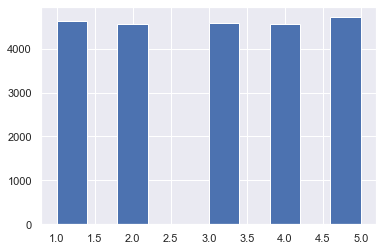

In [80]:
plt.hist(transactions['Qty'])
print(np.mean(transactions['Qty']))
print(np.std(transactions['Qty']))

787.048323428621
415.741349778617


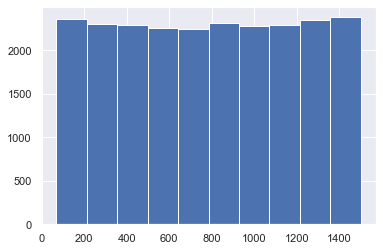

In [81]:
plt.hist(transactions['Rate'])
print(np.mean(transactions['Rate']))
print(np.std(transactions['Rate']))

248.66719168871728
187.17371280732746


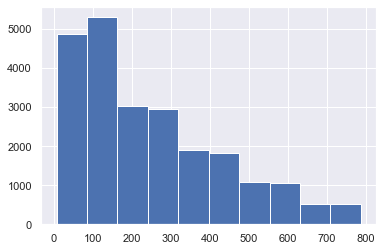

In [82]:
plt.hist(transactions['Tax'])
print(np.mean(transactions['Tax']))
print(np.std(transactions['Tax']))

In [90]:
[x for x in np.abs((transactions['Tax'] - np.mean(transactions['Tax']))/np.std(transactions['Tax'])).values if x > 3]

[]

In [129]:
data = customer.merge(transactions, how='inner', left_on='customer_Id', right_on='cust_id')

In [130]:
data

,customer_Id,DOB,Gender,city_code,customer_age,customer_age_years,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,calculated_amt
0,268408,1970-02-01,M,4.0,18569 days 23:42:28.483317,50,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,1033.175
1,268408,1970-02-01,M,4.0,18569 days 23:42:28.483317,50,16197868036,268408,2013-12-16,1,4,5,210,110.250,1160.250,Flagship store,1160.250
2,268408,1970-02-01,M,4.0,18569 days 23:42:28.483317,50,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,1160.250
3,268408,1970-02-01,M,4.0,18569 days 23:42:28.483317,50,28810141075,268408,2013-02-09,10,6,2,813,170.730,1796.730,TeleShop,1796.730
4,268408,1970-02-01,M,4.0,18569 days 23:42:28.483317,50,64633435931,268408,2013-06-05,4,2,3,312,98.280,1034.280,Flagship store,1034.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23031,269626,1992-12-27,F,5.0,10204 days 23:42:28.483317,27,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,704.990
23032,269626,1992-12-27,F,5.0,10204 days 23:42:28.483317,27,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,3573.570
23033,274308,1992-12-29,F,5.0,10202 days 23:42:28.483317,27,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,1984.580
23034,274308,1992-12-29,F,5.0,10202 days 23:42:28.483317,27,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,3871.920


In [132]:
data = data.merge(prod_cat_info, how='inner', left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'])

In [133]:
# Does customer['city_code'] also correspond to store location?

In [134]:
data

,customer_Id,DOB,Gender,city_code,customer_age,customer_age_years,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,calculated_amt,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,18569 days 23:42:28.483317,50,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,1033.175,Books,7,Fiction
1,275152,1970-01-16,M,4.0,18585 days 23:42:28.483317,50,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,1025.440,Books,7,Fiction
2,275034,1970-01-18,F,4.0,18583 days 23:42:28.483317,50,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,435.370,Books,7,Fiction
3,270829,1970-01-22,F,8.0,18579 days 23:42:28.483317,50,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,5043.220,Books,7,Fiction
4,267657,1970-01-29,F,7.0,18572 days 23:42:28.483317,50,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,4508.400,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23031,267812,1992-04-12,F,1.0,10463 days 23:42:28.483317,28,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,742.560,Books,10,Non-Fiction
23032,274618,1992-09-12,F,7.0,10310 days 23:42:28.483317,28,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,3054.220,Books,10,Non-Fiction
23033,268097,1992-12-15,F,7.0,10216 days 23:42:28.483317,27,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,908.310,Books,10,Non-Fiction
23034,268097,1992-12-15,F,7.0,10216 days 23:42:28.483317,27,90114483354,268097,2011-01-31,10,5,4,1408,591.360,6223.360,e-Shop,6223.360,Books,10,Non-Fiction


In [136]:
data.groupby(['customer_Id', 'city_code'])

customer_Id  city_code
266783       4.0           5
266784       10.0          3
266785       3.0           8
266788       2.0           4
266794       9.0          12
                          ..
275257       5.0           5
275261       10.0          5
275262       10.0          2
275264       4.0           2
275265       3.0           3
Name: city_code, Length: 5502, dtype: int64

In [151]:
customer.loc[:, 'Gender'] = customer['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [152]:
customer.loc[:, 'city_code'] = customer['city_code'].apply(lambda x: int(x) - 1)

/Users/thomasmartin/.local/share/virtualenvs/datascience-projects-UtMDWADh/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([501., 511., 519., 715., 481., 503., 734., 505., 481., 693.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

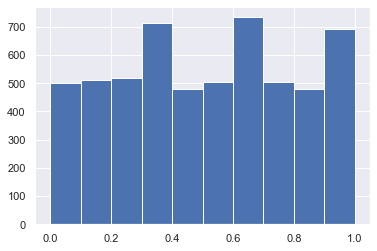

In [153]:
customer['norm_customer_age_years'] = (customer['customer_age_years'] - np.min(customer['customer_age_years'])) / (np.max(customer['customer_age_years']) - np.min(customer['customer_age_years']))
plt.hist(customer['norm_customer_age_years'])

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [164]:
for n_clusters in range(2, 20):

    est = KMeans(n_clusters=n_clusters, random_state=1)

    cluster_labels = est.fit_predict(customer[['Gender', 'city_code', 'norm_customer_age_years']])

    silhouette_avg = silhouette_score(customer[['Gender', 'city_code', 'norm_customer_age_years']], cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5936146814798686
For n_clusters = 3 The average silhouette_score is : 0.5212187269490857
For n_clusters = 4 The average silhouette_score is : 0.4855672667605385
For n_clusters = 5 The average silhouette_score is : 0.46330607289304226
For n_clusters = 6 The average silhouette_score is : 0.4547158317207971
For n_clusters = 7 The average silhouette_score is : 0.3915037136150158
For n_clusters = 8 The average silhouette_score is : 0.4494188173533114
For n_clusters = 9 The average silhouette_score is : 0.4249417087585243
For n_clusters = 10 The average silhouette_score is : 0.4464151183103793
For n_clusters = 11 The average silhouette_score is : 0.45245664615266545
For n_clusters = 12 The average silhouette_score is : 0.4707850011384437
For n_clusters = 13 The average silhouette_score is : 0.48860898277566744
For n_clusters = 14 The average silhouette_score is : 0.5286771752838793
For n_clusters = 15 The average silhouette_score is : 0.

In [174]:
for store_type in data['Store_type'].unique():
    
    print(store_type, data[data['Store_type'] == store_type]['city_code'].value_counts().count())

TeleShop 10
e-Shop 10
Flagship store 10
MBR 10


In [172]:
data[data['Store_type'] == 'MBR']['city_code'].value_counts()

1.0     493
5.0     482
10.0    481
6.0     476
4.0     475
3.0     473
8.0     466
7.0     450
9.0     441
2.0     422
Name: city_code, dtype: int64

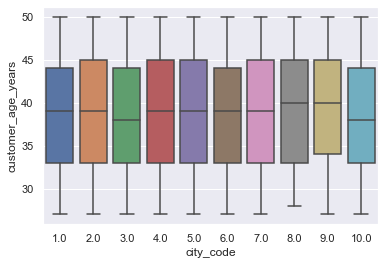

In [179]:
ax = sns.boxplot(x="city_code", y="customer_age_years", data=data)

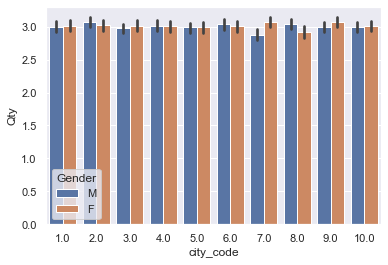

In [180]:
ax = sns.barplot(x="city_code", y="Qty", hue="Gender", data=data)

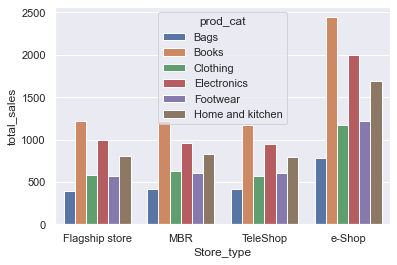

In [185]:
sales_by_prod_cat_store_type = data.groupby(['Store_type', 'prod_cat'])['customer_Id'].count().reset_index()
sales_by_prod_cat_store_type.rename(columns={'customer_Id': 'total_sales'}, inplace=True)

sns.barplot(x='Store_type', y='total_sales', hue='prod_cat', data=sales_by_prod_cat_store_type)